In [2]:
import sklearn 
from sklearn import *
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import *
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.callbacks import *
import tensorflow as tf
#tf.enable_eager_execution()
#tf.set_random_seed(0)
#np.random.seed(0)
from tensorflow.contrib.eager.python import tfe




Using TensorFlow backend.


In [0]:
from keras import models
from keras.optimizers import SGD

from keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
dataset=sklearn.datasets.load_breast_cancer(return_X_y=False)
scaler = StandardScaler()

#print(dataset.data)
print(dataset.target)
target=dataset['target']
data=dataset['data']
data=scaler.fit_transform(data)

nt=target.shape[0]
nd=data.shape[1]
print('nt',nt)
print('nd',nd)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
encoded = to_categorical(target)
print(encoded)
X_train, X_test, y_train, y_test = train_test_split(data, encoded, test_size=0.33)

# kfold cross validation 
 

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [6]:
network = models.Sequential()
network.add(layers.Dense(units=30, activation='relu', input_shape=(nd,)))
network.add(layers.Dense(units=30, activation='relu'))
network.add(Dropout(0.3))

network.add(layers.Dense(units=30, activation='relu'))
network.add(Dropout(0.3))

network.add(layers.Dense(units=2, activation='sigmoid'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
	sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
	network.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


Instructions for updating:
Use tf.cast instead.
Train on 266 samples, validate on 115 samples
Epoch 1/100
266/266 [==============================] - 1s 3ms/step - loss: 0.6546 - acc: 0.6259 - val_loss: 0.6247 - val_acc: 0.7043
Epoch 2/100
266/266 [==============================] - 0s 65us/step - loss: 0.6306 - acc: 0.6128 - val_loss: 0.5945 - val_acc: 0.8087
Epoch 3/100
266/266 [==============================] - 0s 52us/step - loss: 0.5806 - acc: 0.7218 - val_loss: 0.5625 - val_acc: 0.8391
Epoch 4/100
266/266 [==============================] - 0s 51us/step - loss: 0.5646 - acc: 0.7632 - val_loss: 0.5299 - val_acc: 0.8565
Epoch 5/100
266/266 [==============================] - 0s 51us/step - loss: 0.5079 - acc: 0.8064 - val_loss: 0.4951 - val_acc: 0.8870
Epoch 6/100
266/266 [==============================] - 0s 50us/step - loss: 0.4788 - acc: 0.8383 - val_loss: 0.4584 - val_acc: 0.8913
Epoch 7/100
266/266 [==============================] - 0s 50us/step - loss: 0.4404 - acc: 0.8553 - val_

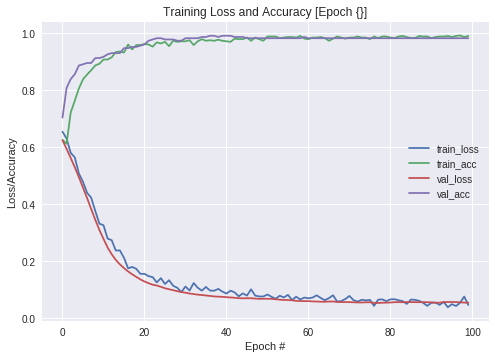

In [8]:
history = network.fit(X_train,
                      y_train, 
                      epochs=100, 
                      verbose=1, 
                      batch_size=50,  validation_split=0.3, shuffle=True
                      )
EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto', baseline=None, restore_best_weights=False)

#validation_data=(test_features, test_target)
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
N=range(100)
plt.figure()
plt.plot(N, history.history['loss'], label = "train_loss")
plt.plot(N, history.history['acc'], label = "train_acc")
plt.plot(N, history.history['val_loss'], label = "val_loss")
plt.plot(N, history.history['val_acc'], label = "val_acc")
plt.title("Training Loss and Accuracy [Epoch {}]")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()